In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud
from PIL import Image

In [54]:
import statsmodels.api as sm
import pylab as py

In [64]:
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns

## Importando Dados do CSV

In [3]:
data = pd.read_csv('lei_rouanet_final_limpado.csv')
data = data[data.columns[1:]]

In [4]:
data.describe()

,com,ret,likes
count,11592.000000,11592.000000,11592.000000
mean,0.973171,4.282005,20.360594
std,14.157082,60.733215,299.949495
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,642.000000,2200.000000,11500.000000


##### Pelo menos 75% dos tweets tem 0 curtidas, retweets e comentarios

### Coletando uma amostra de 8000 elementos

In [5]:
data_set_sample = data.sample(8000)

In [6]:
data_set_sample.describe()

,com,ret,likes
count,8000.000000,8000.000000,8000.000000
mean,0.987000,4.818875,22.814250
std,14.285599,65.376782,321.018975
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,642.000000,2200.000000,10500.000000


### Salvando os tweets da amostra e de todo o data set em variaveis

In [7]:
tweets = data["tweet"]
tweets_sample = data_set_sample["tweet"]

### Mostrando o histograma da coluna de Likes

In [8]:
k = math.ceil(1 + 3.3 * math.log10(len(data_set_sample)))

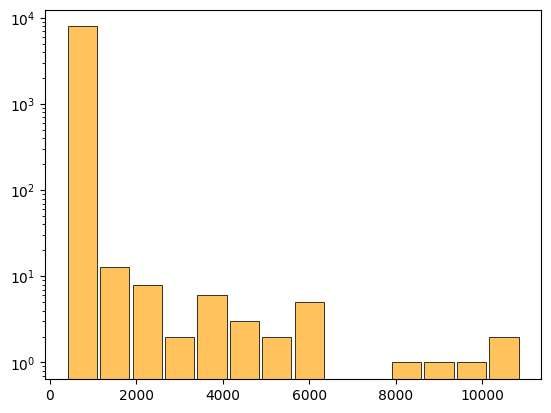

In [51]:
plt.hist(data_set_sample['likes'], bins=k, log = True,align="right", rwidth=0.90, color="#FFC25C", edgecolor='black', linewidth=0.55)
plt.show()

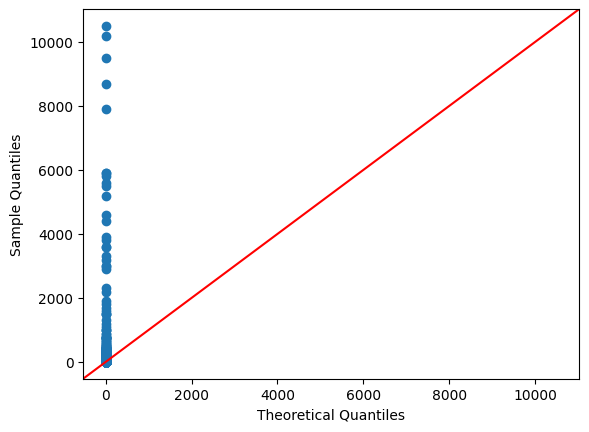

In [62]:
sm.qqplot(data_set_sample['likes'], line ='45')
py.show()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.27it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000025,46653.343730,-156679.291835,inf,0.822739,0.0
chi2,0.000054,3294.985475,-150434.906216,inf,0.902133,0.0
exponpow,0.000059,6273.222026,-149769.759054,inf,0.890624,0.0
rayleigh,0.000062,37388.849389,-149438.314154,inf,0.566094,0.0
norm,0.000069,36774.864112,-148512.968009,inf,0.472593,0.0


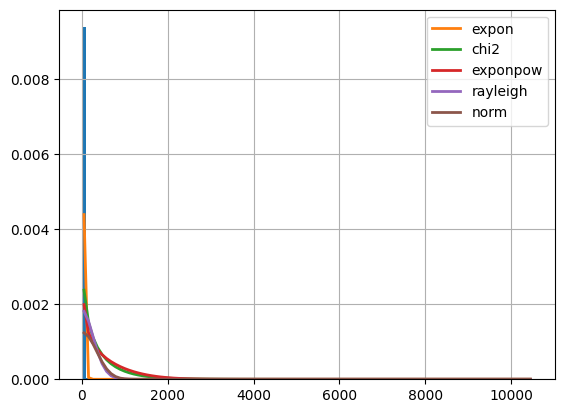

In [67]:
flikes = Fitter(data_set_sample['likes'],
           distributions= get_common_distributions())
flikes.fit()
flikes.summary()

In [68]:
flikes.get_best( ) 

{'expon': {'loc': 0.0, 'scale': 22.81425}}

### Mostrando o histograma da coluna de retweets

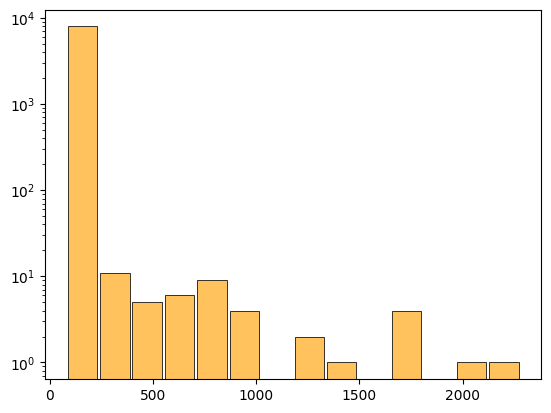

In [49]:
plt.hist(data_set_sample['ret'], bins=k, log = True,align="right", rwidth=0.91, color="#FFC25C", edgecolor='black', linewidth=0.55)
plt.show()

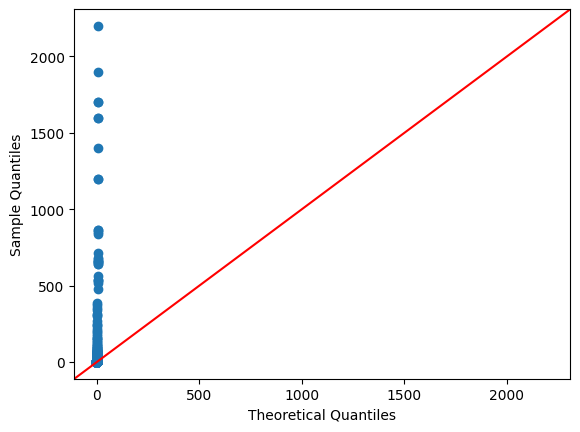

In [61]:
sm.qqplot(data_set_sample['ret'], line ='45')
py.show()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000557,45972.317339,-131820.814532,inf,0.888750,0.0
chi2,0.001224,3032.701605,-125514.667861,inf,0.902932,0.0
exponpow,0.001335,6314.973014,-124822.508790,inf,0.892145,0.0
rayleigh,0.001387,39032.751121,-124522.726969,inf,0.560765,0.0
norm,0.001563,38526.586213,-123567.666887,inf,0.470619,0.0


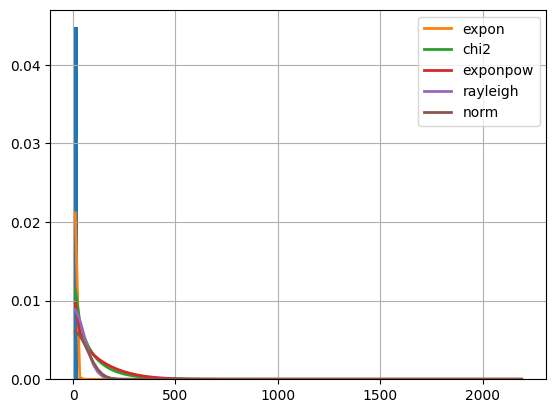

In [69]:
fret = Fitter(data_set_sample['ret'],
           distributions= get_common_distributions())
fret.fit()
fret.summary()

In [70]:
fret.get_best( ) 

{'expon': {'loc': 0.0, 'scale': 4.818875}}

### Mostrando o histograma da coluna de Comentarios

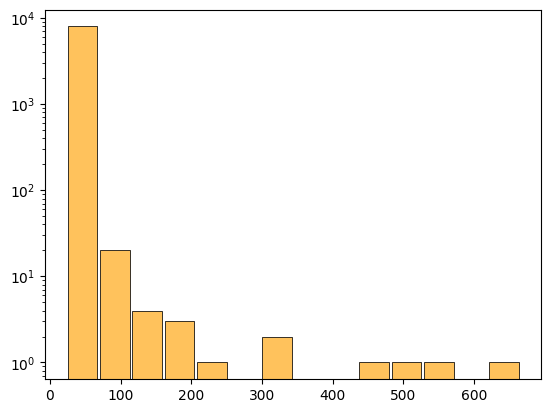

In [48]:
plt.hist(data_set_sample['com'], bins=k, log = True, align="right", rwidth=0.91, color="#FFC25C", edgecolor='black', linewidth=0.55)
plt.show()

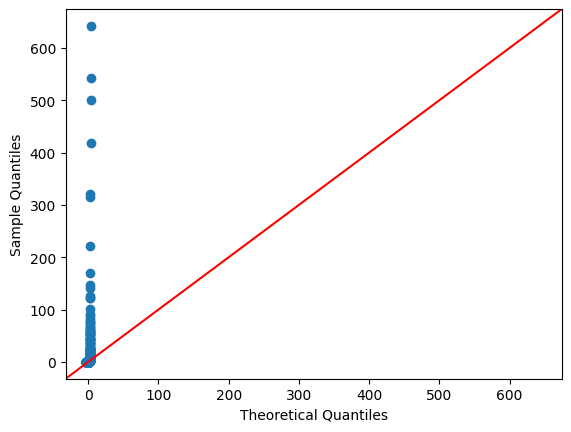

In [58]:
sm.qqplot(data_set_sample['com'], line ='45')
py.show()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.38it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000557,45972.317339,-131820.814532,inf,0.888750,0.0
chi2,0.001224,3032.701605,-125514.667861,inf,0.902932,0.0
exponpow,0.001335,6314.973014,-124822.508790,inf,0.892145,0.0
rayleigh,0.001387,39032.751121,-124522.726969,inf,0.560765,0.0
norm,0.001563,38526.586213,-123567.666887,inf,0.470619,0.0


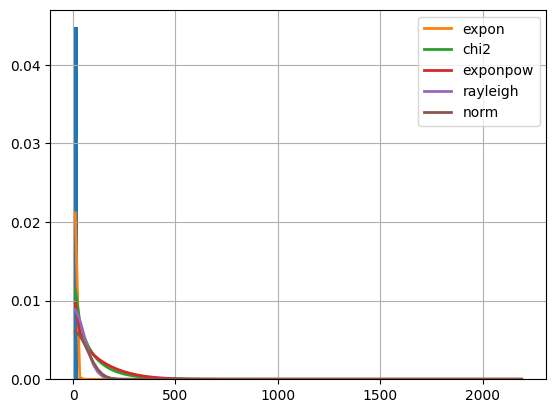

In [71]:
fcom = Fitter(data_set_sample['ret'],
           distributions= get_common_distributions())
fcom.fit()
fcom.summary()

In [72]:
fcom.get_best( ) 

{'expon': {'loc': 0.0, 'scale': 4.818875}}

### Distribuição da quantidade de caracteres dos tweets

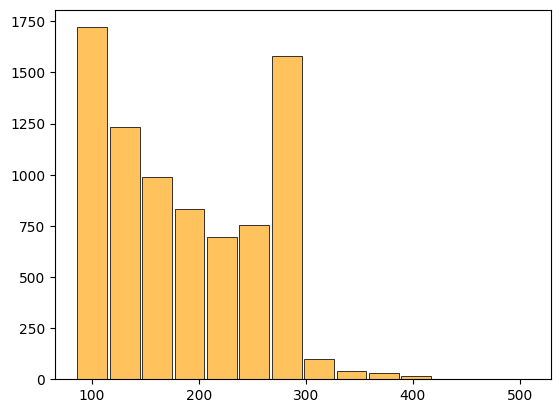

In [44]:
tweet_size = [len(i) for i in tweets_sample]

plt.hist(tweet_size, bins=k, histtype="barstacked", align="right", rwidth=0.92, color="#FFC25C", edgecolor='black', linewidth=0.55)
plt.show()

<Axes: >

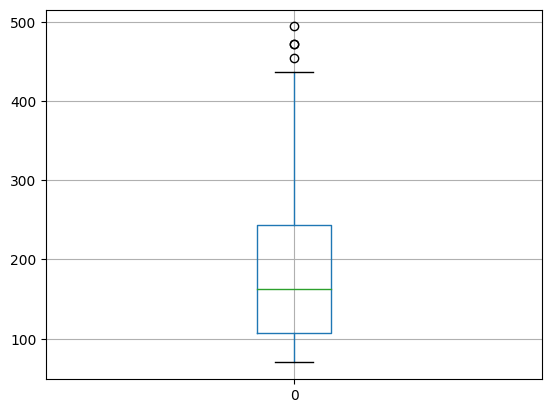

In [52]:
tweet_size_df = pd.DataFrame(tweet_size)

tweet_size_df.boxplot()

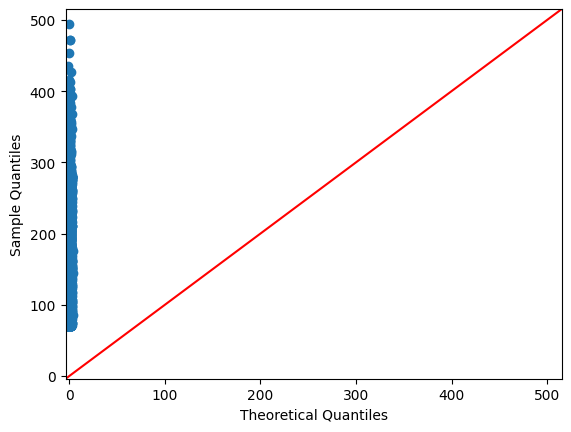

In [57]:
sm.qqplot(tweet_size_df, line ='45')
py.show()

### Calculando correlação entre esses atributos

In [12]:
corr = data_set_sample.corr(method= "spearman", min_periods = 1, numeric_only=True)
corr

,com,ret,likes
com,1.000000,0.544605,0.562534
ret,0.544605,1.000000,0.703596
likes,0.562534,0.703596,1.000000


Pelos valores de indice de correlação, observamos que os atributos likes e retweets tem uma forte correlação positiva,
os demais atributos também apresentam uma correlação positiva mas não tão forte quanto a de cima.

### Plotando o grafico de correlação

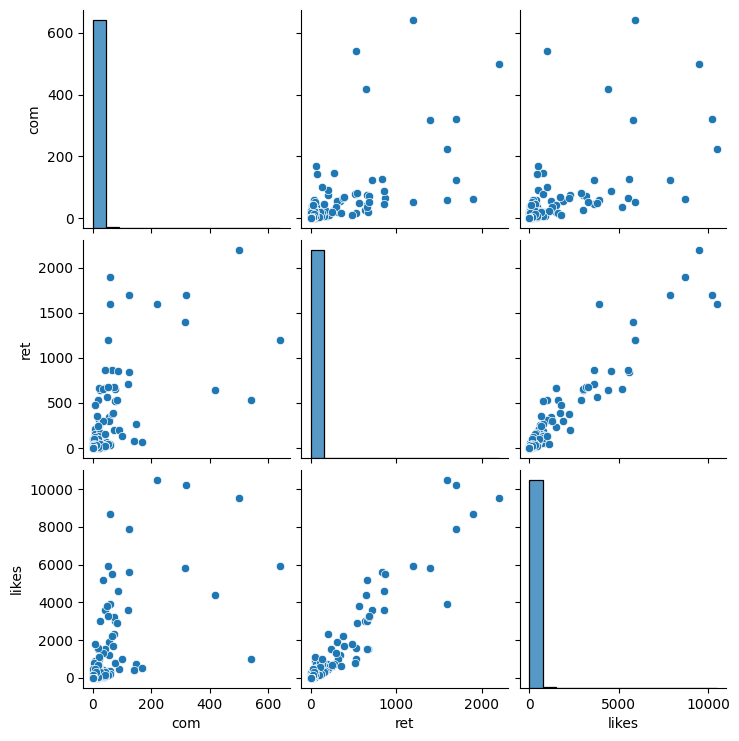

In [13]:
import seaborn as sns
sns.pairplot(data_set_sample)

O grafico acima nos da uma interpretação visual dos valores de correlação que obtemos anteriormente.

## Gerando Nuvem de Palavras

In [14]:
#Lista de palavras com pouca relavancia (não serão incluidas na visualização).

STOPWORDS = ['lei','rouanet', '?','faz','.','assim','à','eles','até','via',
             'pelo','-','ela','ta','era',
             'quem','eu','tá','foi','pela',
             'ser',',','tem','só','sem','vai',
             'é','e','ne','né','isso','onde','estão','esta','está',
             'ver','pq','essa','vez','nas','mas','qual','porque','ele',
             'ter','pois','este','vez','q',
             'para','já','aos','pode','outro',
             'pra','desse','alguns','meio','entre','das',
             'podem','esse','seu','também','são','quando','de', 
             'que','em','os','as','da','como','dos','ou','se','um',
             'uma','para','na','ao','mais','por','não','ainda','muito',
             'sua','a','vc','voce','o','a','você','ai','aí','vocês','vcs'] + list(STOPWORDS)

In [15]:
#Juntando todos os tweets em uma unica String
textos = ""
for tweet in tweets_sample:
    textos += tweet + " "

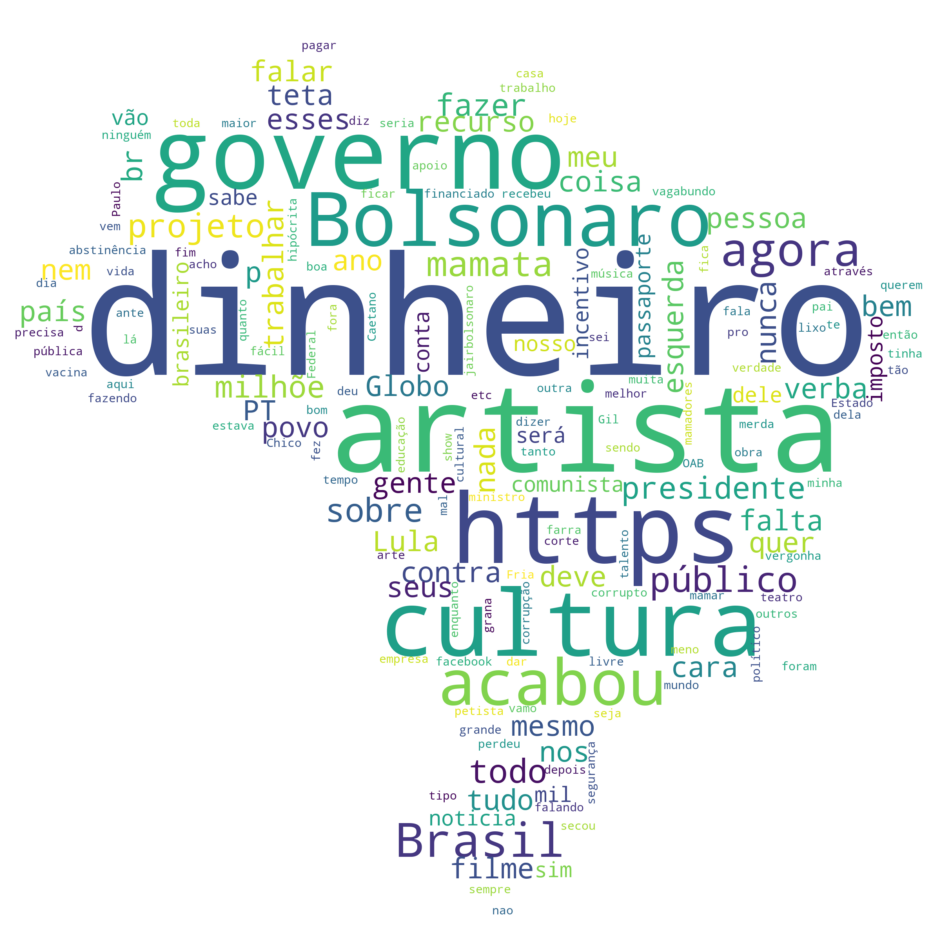

In [16]:
mask = np.array(Image.open('brasil.jpg')) 
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],scale=6, collocations=False)
wc.generate(textos)
plt.figure( figsize=(12,12) ) #ajustar tamanho imagem
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('nuvem_lei.jpg')